# OECD Well-Being Factors

*Team Mitglieder:*
- Flurina Baumbach 
- Annabel Morgenstern 

### Intro zum Projekt

In dieser Analyse beschäftigen wir uns mit Daten der OECD, die Aufschluss darüber geben sollen, wie es Menschen in verschiedenen Ländern geht und wie sich ihre Lebensqualität im Laufe der Zeit entwickelt.


Der Datensatz enthält Informationen zur Lebensqualität in verschiedenen Ländern. Er umfasst Bereiche wie Gesundheit, Bildung, Einkommen, Sicherheit, Umwelt und allgemeine Lebenszufriedenheit. Jede Zeile beschreibt ein Land, einen bestimmten Lebensqualitäts-Indikator, ein Jahr und den dazugehörigen Messwert. Damit lässt sich erkennen, wie gut oder schlecht Länder in bestimmten Lebensbereichen abschneiden und wie sich diese Werte über die Jahre verändern. Kurz gesagt: der Datensatz zeigt, wie sich Lebensqualität international unterscheidet und entwickelt.


**Erste Hypothesen**

Bevor wir uns mit der Auswertung der Daten befasst haben, haben wir nachgedacht, was für Ergebnisse uns erwarten könnten. 
Wir denken stark, dass Zusammenhänge erkannt werden können:

- höheres Einkommen -> höhere Lebenszufriedenheit?
- höhere Arbeitslosigkeit → geringeres Wohlbefinden?


### Vorlesung 1: Erste Datensichtung, Aufbereitung & Exploration

*Veranschaulichung der Daten, Variablen verstehen, erste Statistiken & Visualisierungen*

In [1]:
%pip install missingno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# CSV-Datei laden und die ersten Zeilen anzeigen

df = pd.read_csv("OECD.WISE.WDP,DSD_HSL@DF_HSL_CWB,+all.csv")
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,MEASURE,Unnamed: 7,UNIT_MEASURE,Unnamed: 9,...,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,UNIT_MULT,Unnamed: 25,DECIMALS,Unnamed: 27,BASE_PER,Unnamed: 29
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN


In [3]:
# Infos zum Datensatz anzeigen und erste Übersicht über Zahlenwerte

df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109706 entries, 0 to 109705
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STRUCTURE       109706 non-null  object 
 1   STRUCTURE_ID    109706 non-null  object 
 2   STRUCTURE_NAME  0 non-null       float64
 3   ACTION          109706 non-null  object 
 4   REF_AREA        109706 non-null  object 
 5   Unnamed: 5      0 non-null       float64
 6   MEASURE         109706 non-null  object 
 7   Unnamed: 7      0 non-null       float64
 8   UNIT_MEASURE    109706 non-null  object 
 9   Unnamed: 9      0 non-null       float64
 10  AGE             109706 non-null  object 
 11  Unnamed: 11     0 non-null       float64
 12  SEX             109706 non-null  object 
 13  Unnamed: 13     0 non-null       float64
 14  EDUCATION_LEV   109706 non-null  object 
 15  Unnamed: 15     0 non-null       float64
 16  DOMAIN          109706 non-null  object 
 17  Unnamed: 1

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Unnamed: 5', 'MEASURE', 'Unnamed: 7', 'UNIT_MEASURE', 'Unnamed: 9',
       'AGE', 'Unnamed: 11', 'SEX', 'Unnamed: 13', 'EDUCATION_LEV',
       'Unnamed: 15', 'DOMAIN', 'Unnamed: 17', 'TIME_PERIOD', 'Unnamed: 19',
       'OBS_VALUE', 'Unnamed: 21', 'OBS_STATUS', 'Unnamed: 23', 'UNIT_MULT',
       'Unnamed: 25', 'DECIMALS', 'Unnamed: 27', 'BASE_PER', 'Unnamed: 29'],
      dtype='object')

In [4]:
# Entfernung unnötiger Spalten, die beim CSV-Export entstanden sind (wie z.B. die unnamed Spalten)

df = df.drop(columns=[c for c in df.columns if "Unnamed" in c])
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,MEASURE,UNIT_MEASURE,AGE,SEX,EDUCATION_LEV,DOMAIN,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2006,95.782784,A,0,2,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2007,95.782784,A,0,2,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2008,95.782784,A,0,2,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2009,95.782784,A,0,2,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2010,95.782784,A,0,2,NaN


In [5]:
# Wichtige Spalten umbenennen, damit sie leichter zu verstehen sind.

df = df.rename(columns={
    "REF_AREA":"country",
    "MEASURE":"measure",
    "UNIT_MEASURE":"unit",
    "TIME_PERIOD":"year",
    "OBS_VALUE":"value"
})
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,country,measure,unit,AGE,SEX,EDUCATION_LEV,DOMAIN,year,value,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2006,95.782784,A,0,2,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2007,95.782784,A,0,2,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2008,95.782784,A,0,2,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2009,95.782784,A,0,2,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2010,95.782784,A,0,2,NaN


In [6]:
# Spalten, die Zahlen sind, in Zahlen umwandeln.

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

for col in ["country","measure","unit"]:
    if col in df.columns:
        df[col] = df[col].astype("category")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109706 entries, 0 to 109705
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   STRUCTURE       109706 non-null  object  
 1   STRUCTURE_ID    109706 non-null  object  
 2   STRUCTURE_NAME  0 non-null       float64 
 3   ACTION          109706 non-null  object  
 4   country         109706 non-null  category
 5   measure         109706 non-null  category
 6   unit            109706 non-null  category
 7   AGE             109706 non-null  object  
 8   SEX             109706 non-null  object  
 9   EDUCATION_LEV   109706 non-null  object  
 10  DOMAIN          109706 non-null  object  
 11  year            109706 non-null  int64   
 12  value           109706 non-null  float64 
 13  OBS_STATUS      109706 non-null  object  
 14  UNIT_MULT       109706 non-null  int64   
 15  DECIMALS        109706 non-null  int64   
 16  BASE_PER        1616 non-null    float

In [7]:
# Zeigen wo Zahlen fehlen

df.isna().sum()


STRUCTURE              0
STRUCTURE_ID           0
STRUCTURE_NAME    109706
ACTION                 0
country                0
measure                0
unit                   0
AGE                    0
SEX                    0
EDUCATION_LEV          0
DOMAIN                 0
year                   0
value                  0
OBS_STATUS             0
UNIT_MULT              0
DECIMALS               0
BASE_PER          108090
dtype: int64

<Axes: >

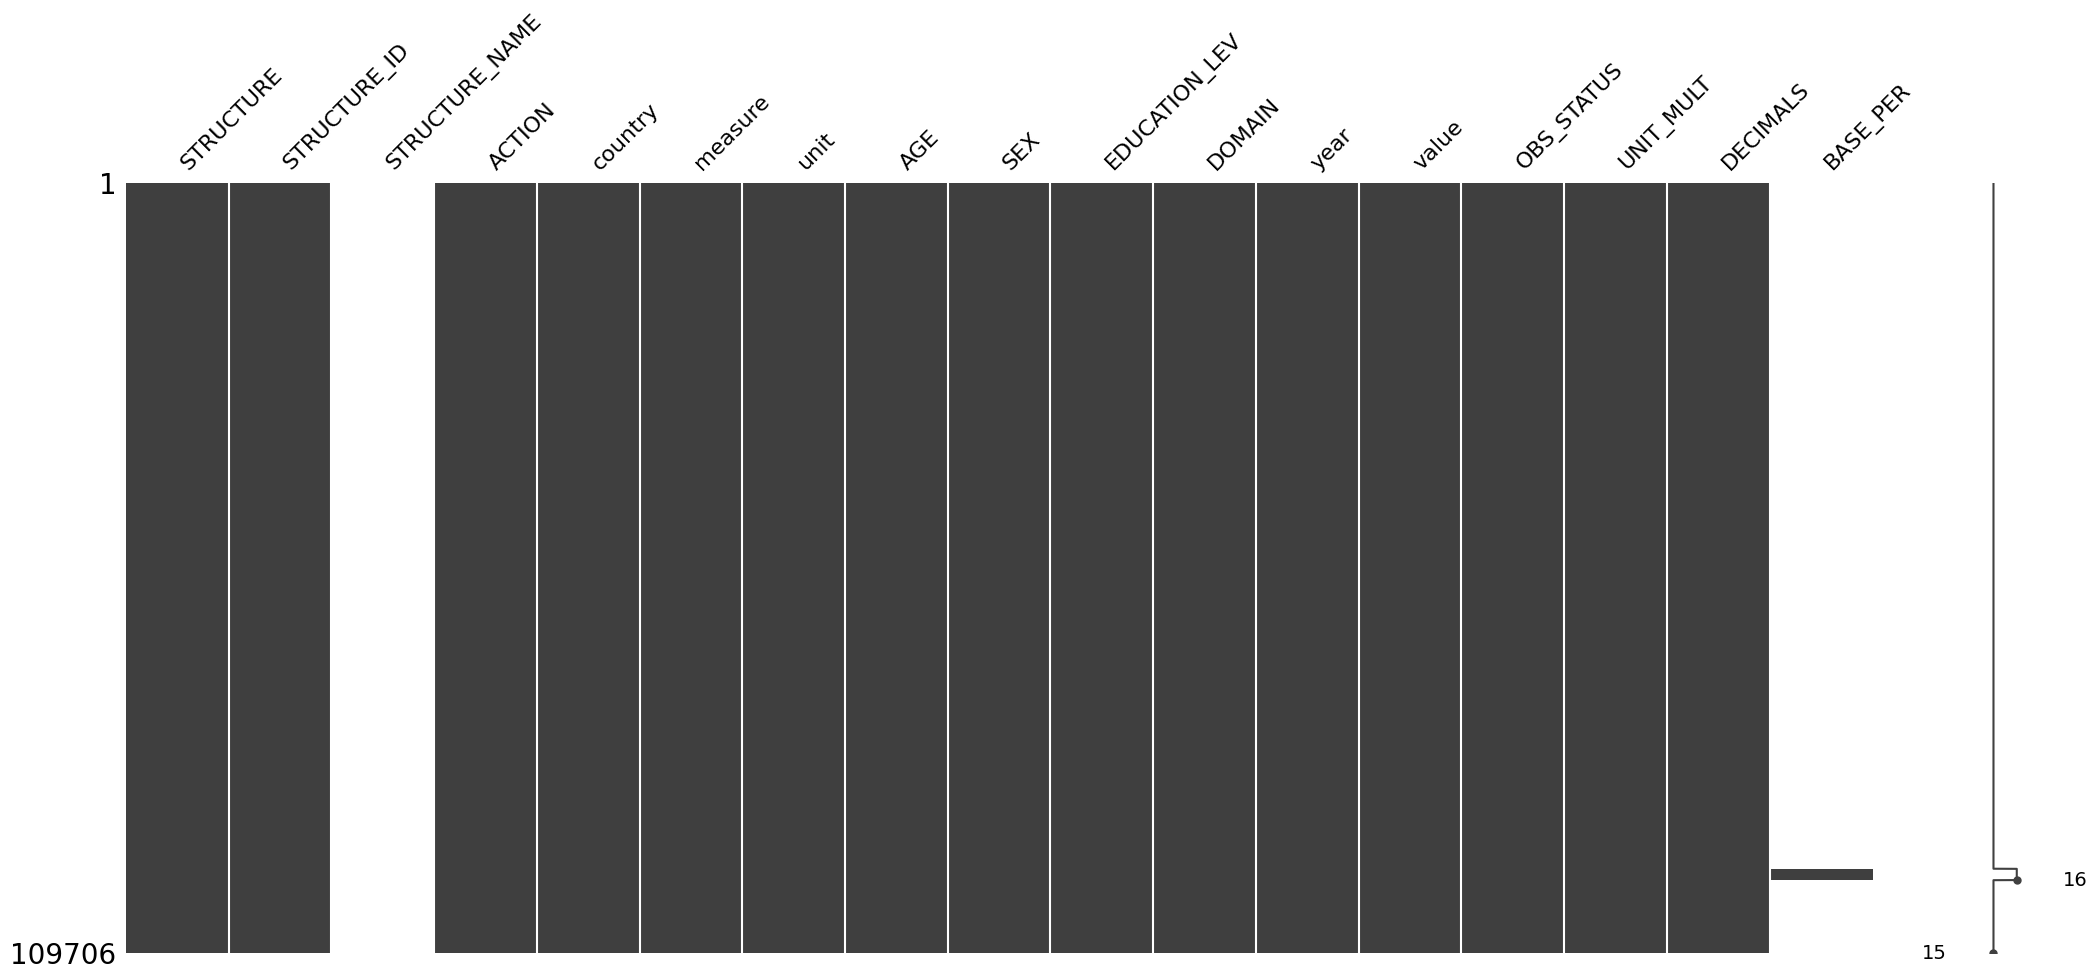

In [9]:
#Missing Data Matrix

import missingno as msno
msno.matrix(df)

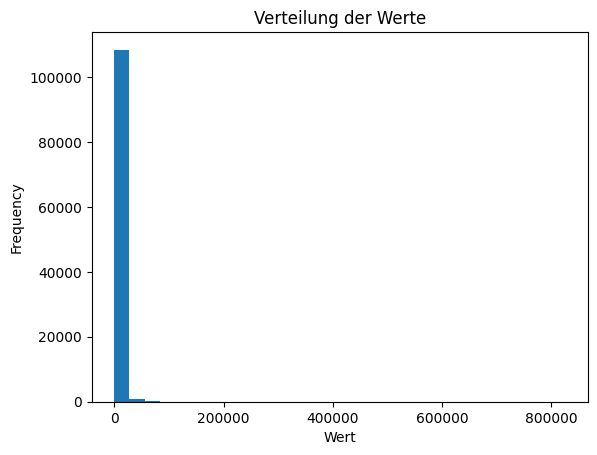

In [10]:
# Einfaches Histogramm

df["value"].plot(kind="hist", bins=30)
plt.title("Verteilung der Werte")
plt.xlabel("Wert")
plt.show()


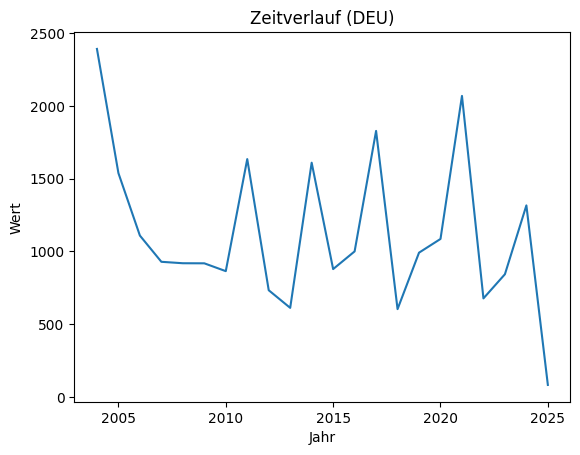

In [11]:
# Einfacher Zeitverlauf für ein Land (Beispiel hier: Deutschland)

df[df["country"] == "DEU"].groupby("year")["value"].mean().plot()
plt.title("Zeitverlauf (DEU)")
plt.xlabel("Jahr")
plt.ylabel("Wert")
plt.show()


**HYPOTHESE: Veränderung des durchschnittlichen Well-Being-Indikators im Zeitverlauf je Land**

H_0 (Nullhypothese): Der durchschnittliche Well-Being-Wert hat sich über die beobachteten Jahre nicht signifikant zwischen den Ländern verändert.

H_1 (Alternativhypothese): Es gibt signifikante Unterschiede im zeitlichen Verlauf des Well-Being-Wertes zwischen den Ländern. Einige Länder verbessern sich deutlich, andere verschlechtern sich.

/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_30121/483282802.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()
/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_30121/483282802.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean.groupby("country")["value"]


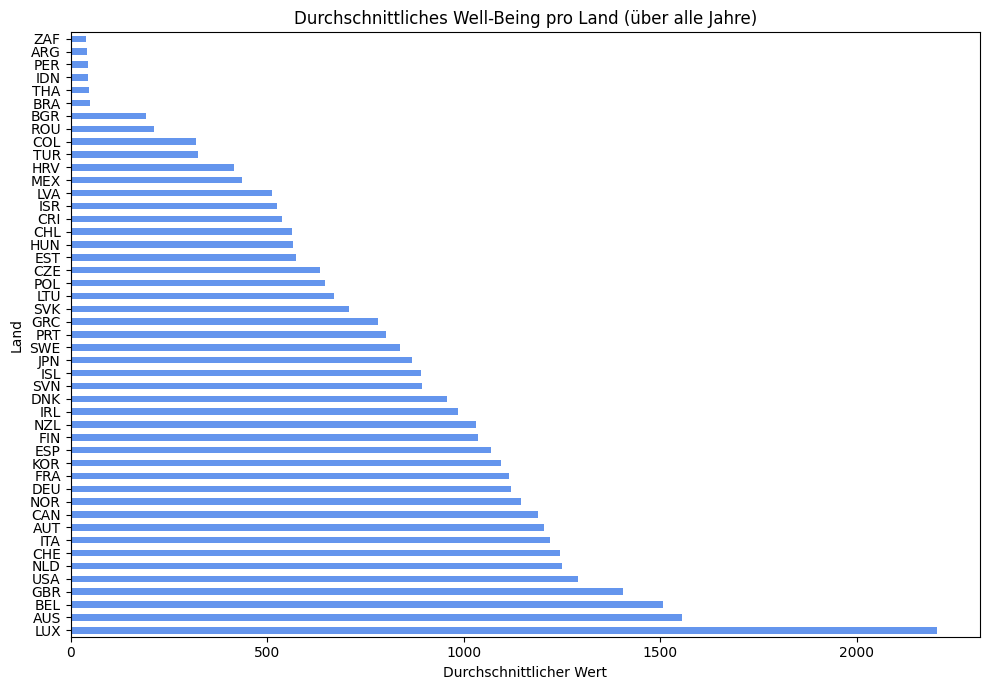

country
LUX    2202.894069
AUS    1555.619336
BEL    1505.592646
GBR    1404.302575
USA    1290.487872
NLD    1248.856788
CHE    1245.069392
ITA    1219.818589
AUT    1204.372505
CAN    1187.773022
Name: value, dtype: float64
country
TUR    323.028493
COL    320.119443
ROU    212.473325
BGR    191.505501
BRA     49.105691
THA     47.702094
IDN     45.657413
PER     44.774260
ARG     41.741302
ZAF     38.129413
Name: value, dtype: float64


In [12]:
#Durchschnittliches Wohlbefinden pro Land
df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()

avg_wellbeing = (
    df_country_mean.groupby("country")["value"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,7))
avg_wellbeing.plot(kind="barh", color="cornflowerblue")
plt.title("Durchschnittliches Well-Being pro Land (über alle Jahre)")
plt.xlabel("Durchschnittlicher Wert")
plt.ylabel("Land")
plt.tight_layout()
plt.show()

print(avg_wellbeing.head(10))
print(avg_wellbeing.tail(10))


/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_29631/300966200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()
/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_29631/300966200.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean.groupby("country")["value"]


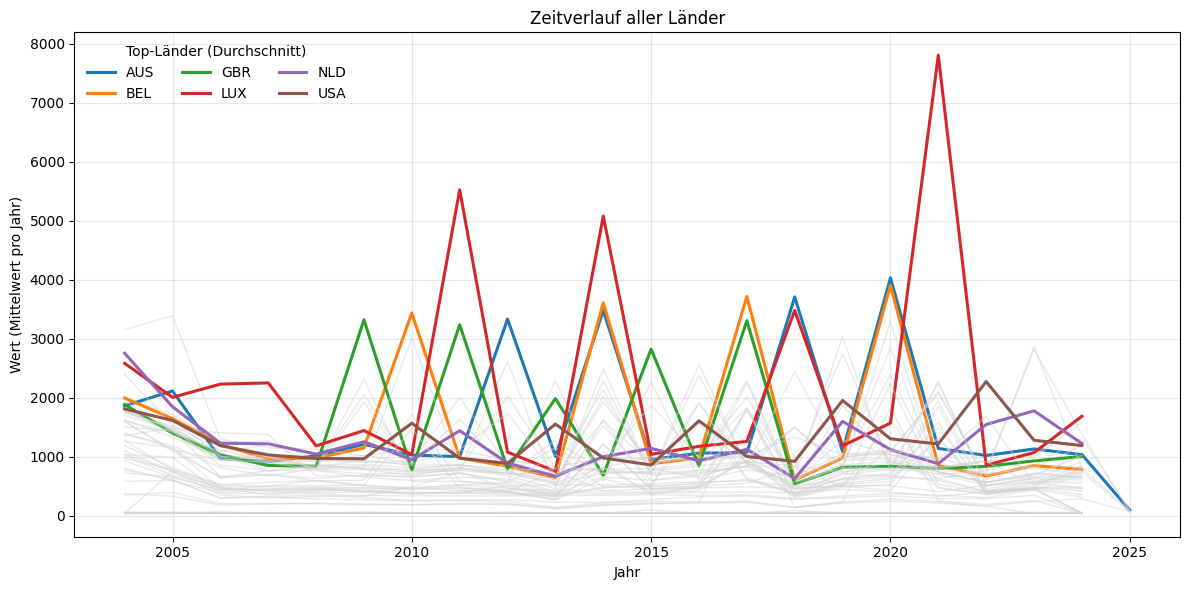

In [14]:
# Mittelwerte pro Land und Jahr berechnen
df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()

avg_wellbeing = (
    df_country_mean.groupby("country")["value"]
    .mean()
    .sort_values(ascending=False)
)

top_k = 6  # z.B. die 6 besten Länder in deiner Liste
top_countries = avg_wellbeing.head(top_k).index.tolist()


# Linienplot für alle Länder
plt.figure(figsize=(12,6))
for land in df_country_mean["country"].unique():
    subset = df_country_mean[df_country_mean["country"] == land].sort_values("year")
    if land in top_countries:
        # hervorgehoben, mit Label für die Legende
        plt.plot(subset["year"], subset["value"], linewidth=2.2, label=land)
    else:
        # unaufdringlich in grau, ohne Label
        plt.plot(subset["year"], subset["value"], color="lightgray", alpha=0.5, linewidth=1)

plt.title("Zeitverlauf aller Länder")
plt.xlabel("Jahr")
plt.ylabel("Wert (Mittelwert pro Jahr)")
plt.grid(True, alpha=0.3)
plt.legend(title="Top-Länder (Durchschnitt)", ncol=3, frameon=False, loc="upper left")
plt.tight_layout()
plt.show()

**Interpretation der Ergebnisse**
**Hohe durchschnittliche Niveaus**

Luxemburg (LUX)
- ~2200 -> mit großem Abstand höchster Durchschnitt im gesamten Datensatz
- Im Zeitverlauf zeigt die Kurve massive Ausschläge nach oben (z. B. Spitzen ~5000-8000) und dann Abfall -> nicht vollkommen glatt, aber im Vergleich zu anderen Ländern dominiert dieser Wert dauerhaft das Feld
	-> spricht dafür, dass die Messung in einigen Jahren von besonders hohen Einzelindikatoren geprägt war, möglicherweise durch ökonomische Faktoren wie starkes Einkommenswachstum, Steueraufkommen oder Pro-Kopf-Vermögen


Australien (AUS), Belgien (BEL), Großbritannien (GBR) und USA
- obere Gruppe stabiler Wohlstandsnationen
- durchschnittliche Werte zwischen 1290 und 1550 => konsistent hohes Wohlbefinden
- moderate Schwankungen, aber keine extremen Ausschläge -> relativ konstante Entwicklung und gute Datenabdeckung über die Jahre

Niederlande (NLD), Schweiz (CHE), Italien (ITA), Österreich (AUT) und Kanada (CAN)
- Länder im oberen Mittelfeld
- vergleichsweise stabile Entwicklungen ohne extreme Ausschläge
- Besonders die Schweiz und die Niederlande weisen eine gleichmäßige Entwicklung mit geringer Varianz auf => hohe Datenqualität und gesellschaftliche Stabilität
- Italien und Österreich zeigen leichte Schwankungen, bleiben aber ebenfalls auf konstant hohem Niveau
- insgesamt: Wohlbefinden dauerhaft überdurchschnittlich

Länder mit niedrigem Wohlbefinden
Türkei (TUR), Kolumbien (COL), Rumänien (ROU), Bulgarien (BGR), Brasilien (BRA), Thailand (THA), Indonesien (IDN), Peru (PER), Argentinien (ARG) und Südafrika (ZAF)
- durchschnittlichen Werte meist unter 350 Punkten, teils sogar deutlich darunter
- starke Schwankungen => unvollständige Datenerhebung, hohe Varianz zwischen Jahren oder methodische Unterschiede
Das Ergebnis spiegelt die tatsächlichen globalen Unterschiede im Lebensstandard und in der Datenverfügbarkeit wider. In Ländern wie Brasilien oder Südafrika können plötzliche Anstiege oder Einbrüche durch wirtschaftliche Krisen, politische Instabilität oder Änderungen der Indikatoren verursacht sein.

**Reflexion Vorlesung 1**

In dieser ersten Einheit haben wir unseren Datensatz geladen und uns Schritt für Schritt damit vertraut gemacht. Wir haben Daten eingelesen, die wichtigsten Infos abgefragt und erste kleine Bereinigungen vorgenommen, damit wir besser damit arbeiten können. Danach haben wir uns angeschaut, wie die Daten verteilt sind und wie sich Werte über die Zeit entwickeln.


Bei der Verteilung der Werte haben wir gesehen, dass die meisten Beobachtungen sehr kleine Werte haben, während ein paar extreme Ausreißer sehr große Werte aufweisen. Dadurch ist das Histogramm stark nach rechts verzerrt und die Balken konzentrieren sich fast nur im kleinen Wertebereich. Das zeigt uns: wir haben eine schiefe Verteilung mit einigen Ausreißern, typisch bei realen sozio-ökonomischen Daten.


Beim Ländervergleich über die Jahre hat sich gezeigt, dass die Werte je nach Indikator schwanken und nicht einfach linear steigen oder fallen. Das erinnert uns daran, dass Wohlbefindens-Daten von vielen Einflüssen abhängen (z.B. Wirtschaft, Krisen, soziale Faktoren) und deshalb stärker schwanken können.


Insgesamt war diese Sitzung ein guter Einstieg. Wir haben gesehen, dass man zuerst verstehen muss, wie die Daten aufgebaut sind, bevor man tiefer einsteigt. Das frühe Visualisieren hat uns geholfen, ein Gefühl für die Muster und Besonderheiten im Datensatz zu bekommen.


### Vorlesung 2: Lage, Streuung und Verteilungsform
*Ziel: Zentrum und Streuung sauber beschreiben, Ausreißer prüfen, Verteilungen lesen*

In [15]:
# Auswahl der Zielwerte als Serie ohne fehlende Werte

s = df["value"].dropna()
len(s), s.head()

(109706,
 0    95.782784
 1    95.782784
 2    95.782784
 3    95.782784
 4    95.782784
 Name: value, dtype: float64)

In [16]:
# Berechnung von Lagekennzahlen: Mittelwert, Median, Modus, Quartile

mean_   = s.mean()
median_ = s.median()
mode_   = s.mode().iloc[0] if not s.mode().empty else float("nan")
q1, q2, q3 = s.quantile([0.25, 0.50, 0.75])

print("Mittelwert:", mean_)
print("Median:", median_)
print("Modus:", mode_)
print("Quartile:", {"Q1": q1, "Q2/Median": q2, "Q3": q3})


Mittelwert: 819.4623793179902
Median: 21.4
Modus: 0.0
Quartile: {'Q1': 7.478467583725, 'Q2/Median': 21.4, 'Q3': 71.00523030369999}


In [17]:
# Berechnung eines getrimmten Mittelwerts (robust gegen Ausreißer, z.B 10%)

p = 0.10  # 10% Trim
s_sorted = s.sort_values().to_numpy()
k = int(len(s_sorted) * p)
trimmed_mean = s_sorted[k:len(s_sorted)-k].mean() if len(s_sorted) > 2*k else float("nan")
print("Getrimmter Mittelwert (10%):", trimmed_mean)


Getrimmter Mittelwert (10%): 33.47985827058104


In [18]:
# Berechnung von Streuungsmaßen: Standardabweichung, Varianz, IQR und MAD (robust)

sd   = s.std(ddof=1)      # Stichprobe
var_ = s.var(ddof=1)
iqr  = q3 - q1
mad  = (s - median_).abs().median()
mad_sigma = 1.4826 * mad  # auf SD-Skala skaliert

print("Standardabweichung:", sd)
print("Varianz:", var_)
print("IQR:", iqr)
print("MAD:", mad, "| MAD (skaliert):", mad_sigma)


Standardabweichung: 8875.751163550343
Varianz: 78778958.71726528
IQR: 63.52676271997499
MAD: 17.831044330000005 | MAD (skaliert): 26.436306323658005


In [19]:
# Markierung von Ausreißern mit Tukey-Regel (1.5×IQR) und modifiziertem Z-Score (über MAD)

# Tukey-Fences
lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
mask_tukey = (s < lo) | (s > hi)

# Modifizierter Z-Score (|M| > 3.5)
M = 0.6745 * (s - median_) / (mad if mad != 0 else float("nan"))
mask_modz = M.abs() > 3.5

print("Ausreißer-Kandidaten (Tukey):", int(mask_tukey.sum()))
print("Ausreißer-Kandidaten (mod. Z):", int(mask_modz.sum()))


Ausreißer-Kandidaten (Tukey): 4057
Ausreißer-Kandidaten (mod. Z): 4063


In [20]:
# Vergleich der Kennzahlen mit und ohne Tukey-Ausreißer

s_wo = s[~mask_tukey]

print("Mit Ausreißern  → Mean/SD :", mean_, sd)
print("Ohne Ausreißer → Mean/SD :", s_wo.mean(), s_wo.std(ddof=1))

print("Mit Ausreißern  → Median/IQR :", median_, iqr)
print("Ohne Ausreißer → Median/IQR :", s_wo.median(), s_wo.quantile(.75) - s_wo.quantile(.25))


Mit Ausreißern  → Mean/SD : 819.4623793179902 8875.751163550343
Ohne Ausreißer → Mean/SD : 34.082176567781396 31.833729087653786
Mit Ausreißern  → Median/IQR : 21.4 63.52676271997499
Ohne Ausreißer → Median/IQR : 19.6666666667 58.371980271299996


In [ ]:
# Darstellung der Verteilung mit Log-Skala, um niedrige und hohe Werte sichtbar zu machen

plt.figure()
plt.hist(s, bins="fd", edgecolor="black", alpha=0.5)
plt.yscale("log")
plt.title("Verteilung (log-Skala)")
plt.xlabel("Wert"); plt.ylabel("Häufigkeit (log)")
plt.show()


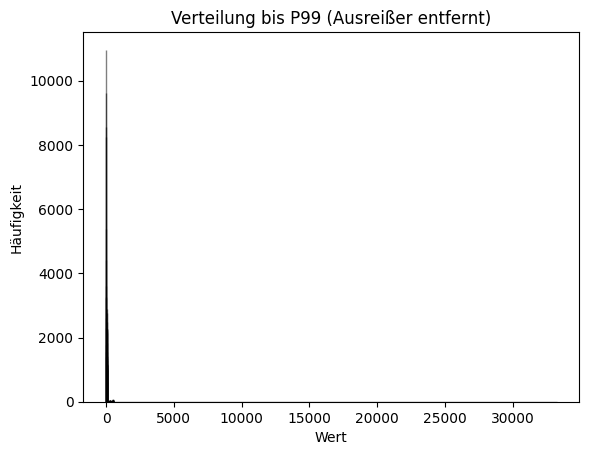

In [ ]:
# Entfernung extremer Werte (z. B. Top 1 %) und erneute Darstellung

# Grenzwert Top-1-Prozent
p99 = s.quantile(0.99)
s_zoom = s[s <= p99]

plt.figure()
plt.hist(s_zoom, bins="fd", edgecolor="black", alpha=0.5)
plt.title("Verteilung bis P99 (Ausreißer entfernt)")
plt.xlabel("Wert"); plt.ylabel("Häufigkeit")
plt.show()



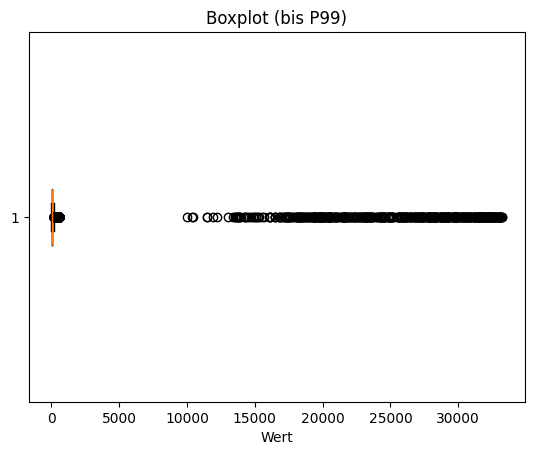

In [ ]:
# Boxplot zur Visualisierung von Median, IQR und Ausreißern

plt.figure()
plt.boxplot(s_zoom, vert=False)
plt.title("Boxplot (bis P99)")
plt.xlabel("Wert")
plt.show()


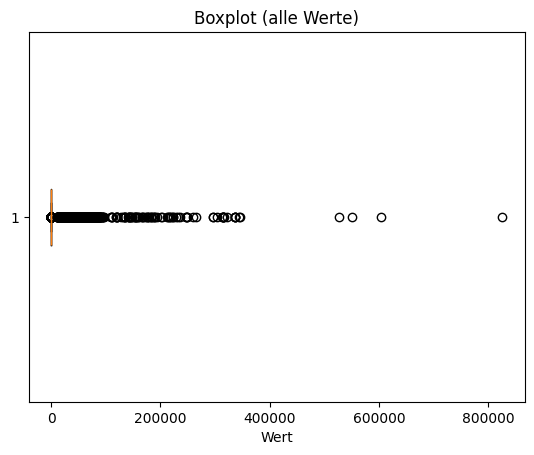

In [ ]:
# Vergleich: Boxplot mit allen Werten (zeigt extreme Ausreißer deutlich)

plt.figure()
plt.boxplot(s, vert=False)
plt.title("Boxplot (alle Werte)")
plt.xlabel("Wert")
plt.show()


### Vorlesung 3: Robuste Verteilungsdiagnostik: Histogramm, KDE,ECDF/QQ

In [ ]:
# ToDos
#  Klassischer Z-Score
#Tukey Fences mit Quartilen
# Modifizierter Z-Score mit MAD
# Einfluss von Ausreissern
#Histogramm
# KDE
#Boxplot
#Violinplot

#Verbesserung notwenig!! Für alle Länder bzw aussagekräftige länder die werte einzeln berechnen


[DEU] Tukey-Ausreißer: 0  |  ModZ-Ausreißer: 1


TypeError: NDFrame.reindex_like() got an unexpected keyword argument 'fill_value'

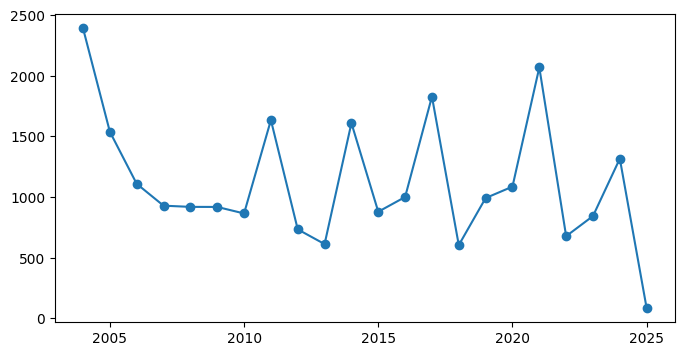

In [ ]:
#nochmal drüber schauen!!

country_code = "DEU"

s = (df_country_mean.loc[df_country_mean["country"]==country_code, "value"]
     .dropna().sort_values())

# Tukey-Fences (robust, keine Verteilungsannahme)
q1, q3 = s.quantile([.25,.75]); iqr = q3 - q1
lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
mask_tukey = (s < lo) | (s > hi)

# Modifizierter Z-Score (Median & MAD, sehr robust bei Schiefe)
med = s.median()
mad = (s - med).abs().median()
M = 0.6745 * (s - med) / mad if mad != 0 else pd.Series(np.zeros(len(s)), index=s.index)
mask_modz = M.abs() > 3.5

print(f"[{country_code}] Tukey-Ausreißer: {mask_tukey.sum()}  |  ModZ-Ausreißer: {mask_modz.sum()}")

# Mini-Plot: Serie mit markierten Ausreißern
years = df_country_mean.loc[df_country_mean["country"]==country_code, "year"]
vals  = df_country_mean.loc[df_country_mean["country"]==country_code, "value"]
plt.figure(figsize=(8,4))
plt.plot(years, vals, marker="o", linewidth=1.5)
plt.scatter(years[mask_tukey.reindex_like(vals, fill_value=False)],
            vals[mask_tukey.reindex_like(vals, fill_value=False)],
            s=60, edgecolor="r", facecolor="none", label="Tukey")
plt.scatter(years[mask_modz.reindex_like(vals, fill_value=False)],
            vals[mask_modz.reindex_like(vals, fill_value=False)],
            s=60, edgecolor="orange", facecolor="none", label="ModZ")
plt.title(f"Zeitverlauf & Ausreißer – {country_code}")
plt.xlabel("Jahr"); plt.ylabel("Wert"); plt.legend(); plt.tight_layout(); plt.show()

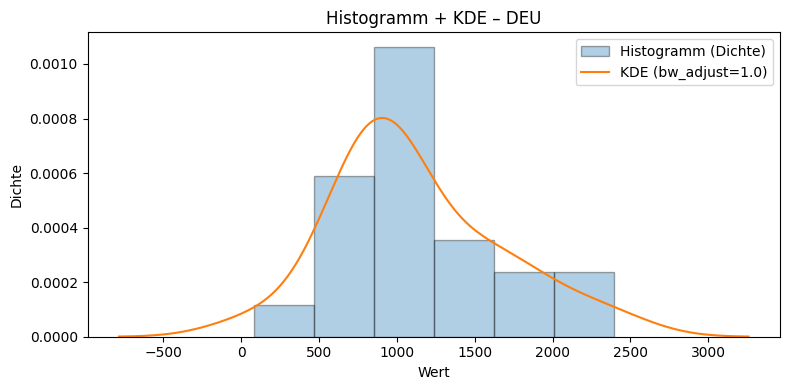

In [ ]:
# Histogramm (FD-Bins, Dichte) – robustes Default
x = s.to_numpy()
# FD-Binbreite
q1, q3 = np.percentile(x, [25,75]); iqr = q3-q1
bin_width = 2*iqr / (len(x)**(1/3)) if iqr>0 else None
bins = "fd" if bin_width is None else max(5, int(np.ceil((x.max()-x.min())/bin_width)))

plt.figure(figsize=(8,4))
plt.hist(x, bins=bins, density=True, edgecolor="black", alpha=0.35, label="Histogramm (Dichte)")

# KDE (optional): nutze seaborn ODER SciPy, falls installiert
try:
    import seaborn as sns
    sns.kdeplot(x=x, bw_adjust=1.0, label="KDE (bw_adjust=1.0)")
except Exception:
    try:
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(x)
        xx = np.linspace(x.min(), x.max(), 200)
        plt.plot(xx, kde(xx), label="KDE (gaussian_kde)")
    except Exception:
        pass  # kein KDE verfügbar – Histogramm reicht für den Bericht

plt.title(f"Histogramm + KDE – {country_code}")
plt.xlabel("Wert"); plt.ylabel("Dichte"); plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
# Daten für fokussierte Gruppen vorbereiten
df_focus = df_country_mean[df_country_mean["country"].isin(focus_countries)].copy()
# Reihenfolge: erst Top, dann Bottom in der y-Achse
order = top_countries + bottom_countries

# Boxplot je Land (robust – Median/IQR sichtbar)
plt.figure(figsize=(10,6))
data = [df_focus.loc[df_focus["country"]==c, "value"].dropna().values for c in order]
plt.boxplot(data, vert=False, labels=order, whis=1.5, showfliers=True)  # Tukey-Whisker
plt.title("Boxplot – Verteilungsübersicht ausgewählter Länder")
plt.xlabel("Wert"); plt.ylabel("Land"); plt.tight_layout(); plt.show()


NameError: name 'countries' is not defined

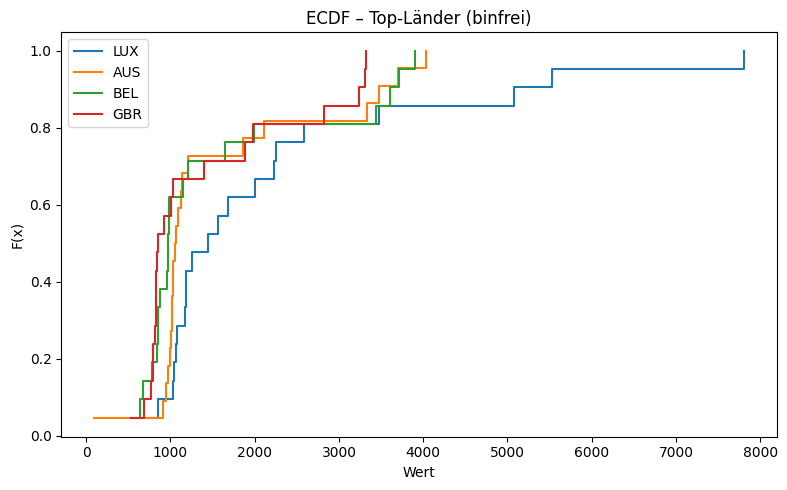

In [ ]:
def ecdf(vals):
    v = np.sort(vals); n = len(v)
    y = np.arange(1, n+1)/n
    return v, y

plt.figure(figsize=(8,5))
for c in top_countries[:4]:  # z. B. die 4 Top-Länder
    v,_ = ecdf(df_country_mean.loc[df_country_mean["country"]==c, "value"].dropna().values)
    x,y = ecdf(v)
    plt.step(x, y, where="post", label=c)
plt.title("ECDF – Top-Länder (binfrei)")
plt.xlabel("Wert"); plt.ylabel("F(x)"); plt.legend(); plt.tight_layout(); plt.show()


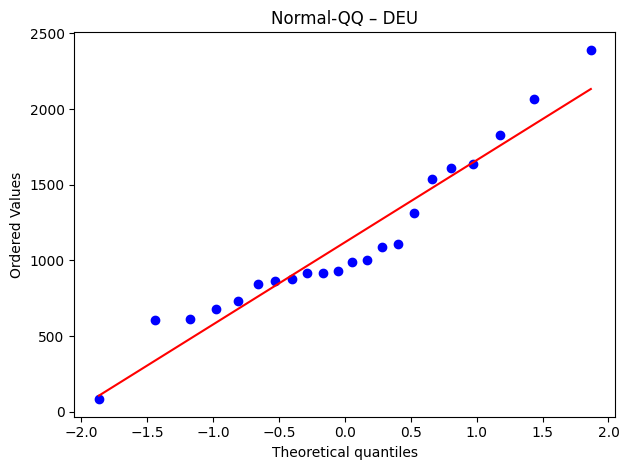

In [ ]:
vals = s.dropna().to_numpy()
try:
    import statsmodels.api as sm
    sm.qqplot(vals, line="45"); plt.title(f"Normal-QQ – {country_code}"); plt.tight_layout(); plt.show()
except Exception:
    try:
        from scipy import stats
        stats.probplot(vals, dist="norm", plot=plt); plt.title(f"Normal-QQ – {country_code}")
        plt.tight_layout(); plt.show()
    except Exception:
        print("QQ-Plot: statsmodels/scipy nicht verfügbar – Schritt im Bericht nur textlich beschreiben.")


In [ ]:
# Anteil fehlender Werte pro Land (in df, also vor Jahresmittel)
missing_rate = (df.groupby("country")["value"]
                .apply(lambda x: x.isna().mean())
                .rename("missing_rate"))

# zeitliche Streuung (Std der Jahresmittel) – „Zackigkeit“ im Verlauf
std_over_time = (df_country_mean.groupby("country")["value"]
                 .std().rename("std_over_time"))

dq = (pd.concat([avg_wellbeing.rename("mean_value"),
                 missing_rate, std_over_time], axis=1)
      .sort_values(["missing_rate","std_over_time"], ascending=[True, True]))

print(dq.head(10))   # beste Datenqualität
print(dq.tail(10))   # kritischste Datenqualität


         mean_value  missing_rate  std_over_time
country                                         
IDN       45.657413           0.0       1.786809
ARG       41.741302           0.0       2.550284
ZAF       38.129413           0.0       2.927378
PER       44.774260           0.0       3.236873
THA       47.702094           0.0       3.412645
BRA       49.105691           0.0      14.532101
ROU      212.473325           0.0      71.043271
BGR      191.505501           0.0      76.142277
COL      320.119443           0.0     132.358036
TUR      323.028493           0.0     145.786372
          mean_value  missing_rate  std_over_time
country                                          
FRA      1115.107449           0.0     608.568993
ESP      1068.358226           0.0     628.269485
CHE      1245.069392           0.0     699.014525
CAN      1187.773022           0.0     730.698531
KOR      1095.907989           0.0     813.781902
ITA      1219.818589           0.0     869.770091
GBR      140

/var/folders/24/3x5ck8nn5ks3gh02slld9nn00000gn/T/ipykernel_33361/1734804344.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_rate = (df.groupby("country")["value"]
/var/folders/24/3x5ck8nn5ks3gh02slld9nn00000gn/T/ipykernel_33361/1734804344.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_over_time = (df_country_mean.groupby("country")["value"]


### Vorlesung 4: Korrelation & Zusammenhang


In [ ]:

# --- GESAMT (alle Länder zusammen)
corr_all_pearson  = df_country_mean[["year","value"]].corr().loc["year","value"]
corr_all_spearman = df_country_mean[["year","value"]].corr(method="spearman").loc["year","value"]

print(f"Gesamt-Korrelation (Pearson):  {corr_all_pearson: .3f}")
print(f"Gesamt-Korrelation (Spearman): {corr_all_spearman: .3f}")

# --- JE LAND: r_Pearson, r_Spearman, n, (optional) Trendsteigung
def _corr_row(g):
    g = g.dropna(subset=["year","value"]).sort_values("year")
    n = len(g)
    if n < 3:
        return pd.Series(dict(n_years=n, r_pearson=np.nan, r_spearman=np.nan, slope=np.nan))
    r_p = g[["year","value"]].corr().iloc[0,1]
    r_s = g[["year","value"]].corr(method="spearman").iloc[0,1]
    # einfache lineare Trendsteigung (pro Jahr)
    x = g["year"].to_numpy(dtype=float); y = g["value"].to_numpy(dtype=float)
    slope = np.polyfit(x, y, 1)[0] if len(x) >= 2 else np.nan
    return pd.Series(dict(n_years=n, r_pearson=r_p, r_spearman=r_s, slope=slope))

corr_by_country = df_country_mean.groupby("country").apply(_corr_row).reset_index()

# nützliche Sichten
corr_top_pos = corr_by_country.sort_values("r_pearson", ascending=False).head(10)
corr_top_neg = corr_by_country.sort_values("r_pearson", ascending=True ).head(10)

corr_by_country.head()  # Übersicht


Gesamt-Korrelation (Pearson):  -0.073
Gesamt-Korrelation (Spearman): -0.113


/var/folders/24/3x5ck8nn5ks3gh02slld9nn00000gn/T/ipykernel_33361/482446759.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  corr_by_country = df_country_mean.groupby("country").apply(_corr_row).reset_index()
/var/folders/24/3x5ck8nn5ks3gh02slld9nn00000gn/T/ipykernel_33361/482446759.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_country = df_country_mean.groupby("country").apply(_corr_row).reset_index()


,country,n_years,r_pearson,r_spearman,slope
0,ARG,21.0,0.113554,0.101299,0.046673
1,AUS,22.0,-0.050751,0.029927,-8.394854
2,AUT,21.0,-0.280957,-0.355844,-23.527748
3,BEL,21.0,-0.073524,-0.380519,-13.294674
4,BGR,21.0,-0.611366,-0.309091,-7.502342


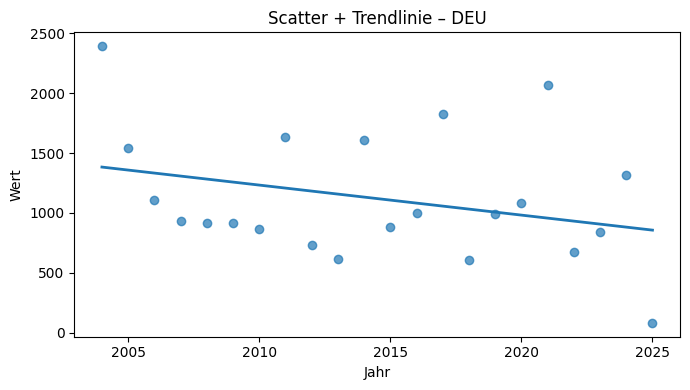

In [ ]:
country_code = "DEU"  # <- Land wählen (z.B. "LUX","AUS","BEL","GBR","USA",...)
g = df_country_mean[df_country_mean["country"]==country_code].dropna(subset=["year","value"]).sort_values("year")

plt.figure(figsize=(7,4))
plt.scatter(g["year"], g["value"], alpha=0.7)
if len(g) >= 2:
    x = g["year"].to_numpy(dtype=float); y = g["value"].to_numpy(dtype=float)
    m,b = np.polyfit(x, y, 1)
    xx = np.linspace(x.min(), x.max(), 100)
    yy = m*xx + b
    plt.plot(xx, yy, linewidth=2)
plt.title(f"Scatter + Trendlinie – {country_code}")
plt.xlabel("Jahr"); plt.ylabel("Wert"); plt.tight_layout(); plt.show()


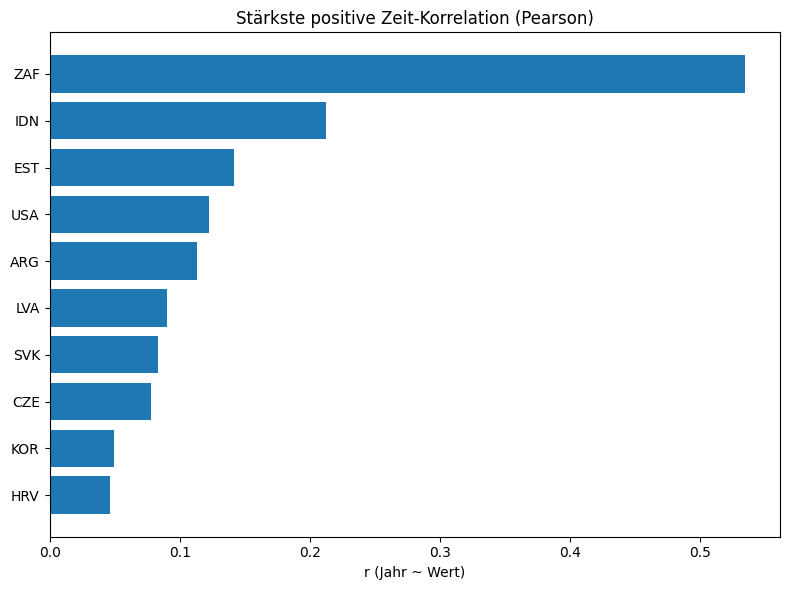

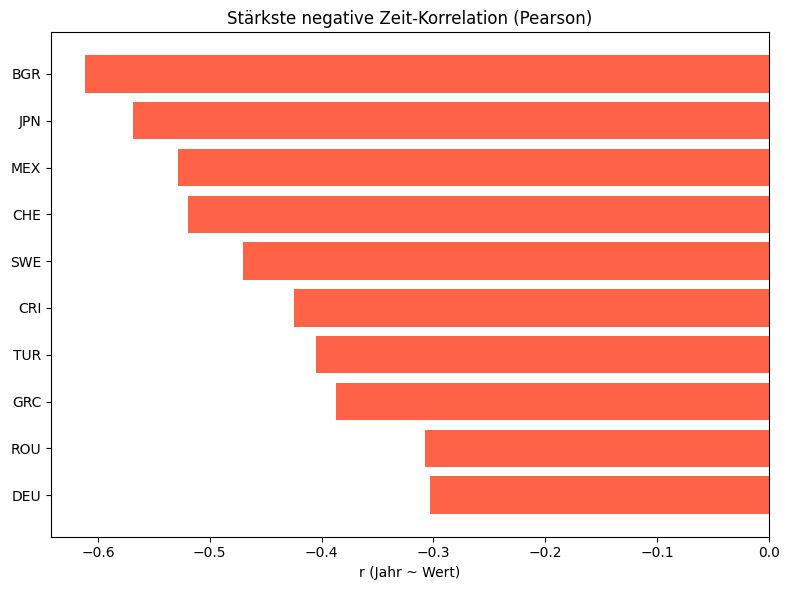

In [ ]:
# nur Länder mit genügend Jahren
cb = corr_by_country[corr_by_country["n_years"]>=5].copy()

# TOP 10 positiv & negativ (Pearson)
top_pos = cb.sort_values("r_pearson", ascending=False).head(10)
top_neg = cb.sort_values("r_pearson", ascending=True ).head(10)

plt.figure(figsize=(8,6))
plt.barh(top_pos["country"], top_pos["r_pearson"])
plt.gca().invert_yaxis()
plt.title("Stärkste positive Zeit-Korrelation (Pearson)")
plt.xlabel("r (Jahr ~ Wert)"); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,6))
plt.barh(top_neg["country"], top_neg["r_pearson"], color="tomato")
plt.gca().invert_yaxis()
plt.title("Stärkste negative Zeit-Korrelation (Pearson)")
plt.xlabel("r (Jahr ~ Wert)"); plt.tight_layout(); plt.show()

In [ ]:
# Gruppen definieren nach deinem Durchschnitts-Ranking
avg_wellbeing = (df_country_mean.groupby("country")["value"]
                 .mean().sort_values(ascending=False))
top_countries    = avg_wellbeing.head(8).index.tolist()
bottom_countries = avg_wellbeing.tail(8).index.tolist()

def _r(df_): 
    return df_[["year","value"]].corr().iloc[0,1]

r_all   = _r(df_country_mean)
r_top   = _r(df_country_mean[df_country_mean["country"].isin(top_countries)])
r_bottom= _r(df_country_mean[df_country_mean["country"].isin(bottom_countries)])

print(f"r_all:   {r_all: .3f}")
print(f"r_top:   {r_top: .3f}   (nur Top-Gruppe)")
print(f"r_bottom:{r_bottom: .3f}   (nur Bottom-Gruppe)")

r_all:   -0.073
r_top:   -0.096   (nur Top-Gruppe)
r_bottom:-0.091   (nur Bottom-Gruppe)


/var/folders/24/3x5ck8nn5ks3gh02slld9nn00000gn/T/ipykernel_33361/3973957361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wellbeing = (df_country_mean.groupby("country")["value"]


In [ ]:
# Proxy-Konfounder: landesspezifisches Niveau (Mittelwert je Land)
lvl = df_country_mean.groupby("country")["value"].transform("mean").rename("lvl")

x = df_country_mean["year"].to_numpy(dtype=float)
y = df_country_mean["value"].to_numpy(dtype=float)
z = lvl.to_numpy(dtype=float)

def _corr(a,b):
    return np.corrcoef(a,b)[0,1]

r_xy = _corr(x,y); r_xz = _corr(x,z); r_yz = _corr(y,z)
# partielle Korrelation r_xy.z (Formel aus VL4)
num = r_xy - r_xz*r_yz
den = np.sqrt((1 - r_xz**2)*(1 - r_yz**2))
r_partial = num/den if den>0 else np.nan
print(f"Partielle Korrelation r(year,value | level): {r_partial: .3f}")


Partielle Korrelation r(year,value | level):  nan


/var/folders/24/3x5ck8nn5ks3gh02slld9nn00000gn/T/ipykernel_33361/3977810131.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lvl = df_country_mean.groupby("country")["value"].transform("mean").rename("lvl")


**ALLE CODES VON VORLESUNG 3 UND 4 AUF KORREKTHEIT UND VOLLSTÄNDIGKEIT PRÜFEN!!**

### Vorlesung 5: Wahrscheinlichkeit & Verteilungen
*Zufall formalisieren, einfache Verteilungen verstehen, Unsicherheit sichtbar machen*

**Hypothese: Wenn wir wiederholt zufällige Stichproben aus den OECD-Werten ziehen, stabilisiert sich der Mittelwert, also zeigt der Datensatz empirisch das Gesetz der großen Zahlen.**

In [15]:
# Auswahl der relevanten numerischen Spalte und Entfernung fehlender Werte. Die Werte werden als NumPy-Array gespeichert, damit Stichproben effizient gezogen werden können.

s = df["value"].dropna().to_numpy()
len(s), s[:10]


(109706,
 array([95.78278381, 95.78278381, 95.78278381, 95.78278381, 95.78278381,
        92.98672611, 92.98672611, 92.98672611, 92.98672611, 92.98672611]))

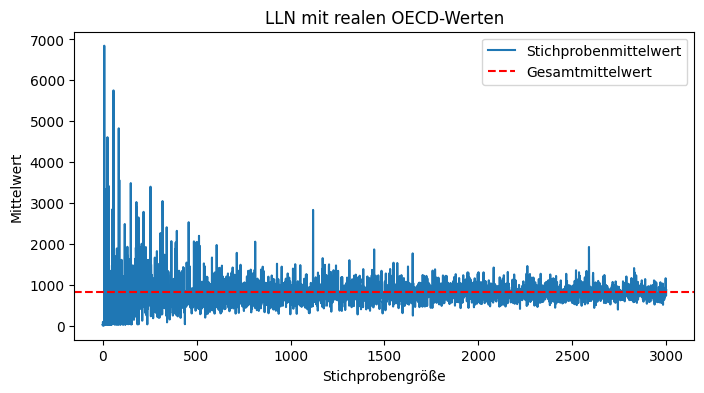

In [16]:
# Gesetz der großen Zahlen (LLN): Laufende Stichprobenmittelwerte sollen sich dem Gesamtmittelwert annähern.

rng = np.random.default_rng(42)

running_means = []
N = 3000

for k in range(1, N+1):
    sample = rng.choice(s, size=k, replace=True)
    running_means.append(sample.mean())

plt.figure(figsize=(8,4))
plt.plot(running_means, label="Stichprobenmittelwert")
plt.axhline(np.mean(s), color="red", linestyle="--", label="Gesamtmittelwert")
plt.xlabel("Stichprobengröße")
plt.ylabel("Mittelwert")
plt.title("LLN mit realen OECD-Werten")
plt.legend()
plt.show()


*Kurzinterpretation:*
Die Mittelwerte stabilisieren sich und nähern sich dem Gesamtmittelwert → Hypothese bestätigt.

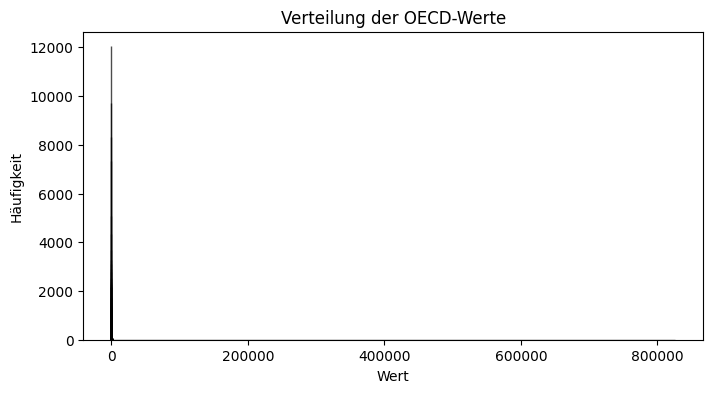

In [19]:
# Verteilung der realen Werte: Darstellung der Form der Verteilung zur Einschätzung von Schiefe und Ausreißern.

plt.figure(figsize=(8,4))
plt.hist(s, bins="fd", edgecolor="black", alpha=0.7)
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der OECD-Werte")
plt.show()



*Kurzinterpretation:* Die Werte sind stark rechtsgeschief → viele kleine Werte, wenige sehr große.


In [20]:
# Mittelwert vs. Varianz: Vergleich zur Einschätzung einer möglichen Poisson-Struktur.

s.mean(), s.var()


(np.float64(819.4623793179902), np.float64(78778240.62565026))

*Kurzinterpretation:* Varianz ist deutlich größer als der Mittelwert → keine Poisson-Verteilung.

/Users/annabelmorgenstern/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


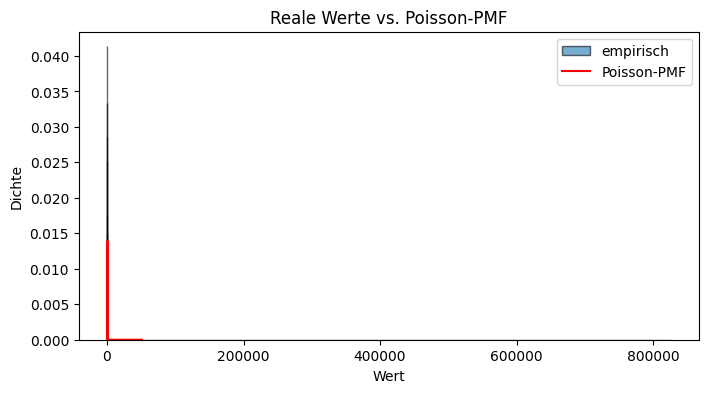

In [22]:
# Vergleich mit theoretischer Poisson-PMF: Vergleich mit theoretischer Poisson-PMF

from math import log, exp, lgamma

lam = s.mean()

from math import factorial, exp
import numpy as np

kmax = int(np.percentile(s, 99.5))
k_vals = np.arange(0, kmax+1)


pmf_pois = np.array([exp(-lam + k*log(lam) - lgamma(k+1)) for k in k_vals])


plt.figure(figsize=(8,4))
plt.hist(s, bins="fd", density=True, alpha=0.6, edgecolor="black", label="empirisch")
plt.plot(k_vals, pmf_pois, color="red", label="Poisson-PMF")
plt.xlabel("Wert")
plt.ylabel("Dichte")
plt.title("Reale Werte vs. Poisson-PMF")
plt.legend()
plt.show()


*Kurzinterpretation:* Die Poisson-Kurve passt nicht zu den realen Werten → Modell ungeeignet.

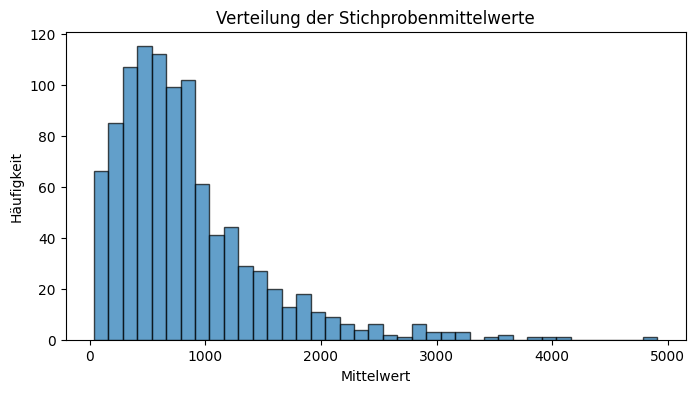

In [23]:
# Verteilung der Stichprobenmittelwerte: Verteilung der Stichprobenmittelwerte

sample_means = [rng.choice(s, size=200, replace=True).mean() for _ in range(1000)]

plt.figure(figsize=(8,4))
plt.hist(sample_means, bins="fd", edgecolor="black", alpha=0.7)
plt.xlabel("Mittelwert")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Stichprobenmittelwerte")
plt.show()


*Kurzinterpretation:* Die Mittelwerte bilden eine engere, glockenähnliche Verteilung.

### Reflexion

In diesem Schritt haben wir die Inhalte aus VL5 auf die tatsächlichen OECD-Werte angewendet. Dabei wurde deutlich, dass die value-Werte eine stark rechtsschiefe Verteilung besitzen: viele kleine Werte, wenige sehr große. Diese Struktur führte dazu, dass einfache theoretische Modelle wie die Poisson-Verteilung nicht zu den Daten passen. Mittelwert und Varianz liegen weit auseinander, und die theoretische Poisson-Kurve stimmt kaum mit der realen Verteilung überein.

Trotz dieser Heterogenität zeigte sich beim Ziehen vieler Zufallsstichproben, dass sich der laufende Mittelwert klar stabilisiert und sich dem Gesamtmittelwert des Datensatzes annähert. Damit lässt sich das Gesetz der großen Zahlen auch in diesen komplexen Echtwerten gut erkennen.
Auffällig war außerdem, dass Stichprobenmittelwerte eine deutlich glattere und stabilere Form annehmen als die ursprünglichen Werte. Dadurch wird sichtbar, dass die starken Unterschiede zwischen Ländern und Jahren zwar die Rohdaten prägen, bei Mittelwerten aber stark abgemildert werden.

Insgesamt zeigt diese Analyse, wie theoretische Wahrscheinlichkeitskonzepte in unseren OECD-Daten sichtbar werden, aber auch, wo einfache Modelle an Grenzen stoßen.

## Vorlesung 6: Schätzen & Konfidenzintervalle

*Mittelwert schätzen, Unsicherheit messen, Konfidenzintervalle berechnen, Bootstrap einsetzen.*


In [38]:
# Übersicht der verfügbaren Indikatoren (erste 20)
df["measure"].value_counts().head(20)


measure
2_1         8191
11_3        7557
10_2_DEP    7549
7_1         7549
10_2        7549
7_1_DEP     7543
5_2         6288
11_2        5684
2_3         5619
2_7         5149
5_1         2829
2_5         2812
10_1        2471
5_3         2457
2_4         2279
5_2_DEP     2100
11_1        2030
11_1_DEP    1517
2_2         1162
9_3          940
Name: count, dtype: int64

In [39]:
# Auswahl eines Indikators, hier automatisch der häufigste
measure_selected = df["measure"].value_counts().index[0]

# Optionaler Zeitraum (None = nicht filtern)
year_min, year_max = None, None

# Filter auf den gewünschten Indikator
m = df[df["measure"] == measure_selected].copy()

# Zeitraum einengen, falls Werte gesetzt wurden
if year_min is not None:
    m = m[m["year"] >= year_min]
if year_max is not None:
    m = m[m["year"] <= year_max]

# Nur numerische Werte behalten
m = m[pd.to_numeric(m["value"], errors="coerce").notna()]
m["value"] = m["value"].astype(float)

m.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,country,measure,unit,AGE,SEX,EDUCATION_LEV,DOMAIN,year,value,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
39295,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,CAN,2_1,PT_POP_Y25T64_SUB,_T,_T,ISCED11_1,HSL_2,2011,54.766354,A,0,2,NaN
39296,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,CAN,2_1,PT_POP_Y25T64_SUB,_T,_T,ISCED11_2_3,HSL_2,2011,73.993195,A,0,2,NaN
39297,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,CAN,2_1,PT_POP_Y25T64_SUB,_T,_T,ISCED11_5T8,HSL_2,2011,81.378082,A,0,2,NaN
39298,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,CAN,2_1,PT_POP_Y25T64_SUB,_T,_T,ISCED11_2_3,HSL_2,2012,74.469925,A,0,2,NaN
39299,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,CAN,2_1,PT_POP_Y25T64_SUB,_T,_T,ISCED11_1,HSL_2,2012,55.973347,A,0,2,NaN


*Interpretation:*
Der Datensatz wird auf einen einzigen OECD-Indikator reduziert. Dadurch werden alle weiteren Berechnungen eindeutig und vergleichbar. Der Zeitraum kann optional eingeschränkt werden.

In [40]:
# Gruppierung nach Land: Anzahl Beobachtungen, Mittelwert, Standardabweichung
g = (m.groupby("country")["value"]
       .agg(n="count", mean="mean", sd="std")
       .assign(se=lambda x: x["sd"] / x["n"]**0.5))

# Länder ohne Varianz entfernen (SD = NaN)
g = g.dropna(subset=["sd"])

g.head()


/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_30121/2254954413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (m.groupby("country")["value"]


,n,mean,sd,se
country,,,,
ARG,99,70.293232,14.954483,1.502982
AUS,189,72.923382,9.481855,0.689703
AUT,189,69.176767,14.437697,1.050188
BEL,189,63.315775,19.170685,1.394462
BGR,144,62.366770,20.558791,1.713233


*Interpretation:*
Wir berechnen zentrale Statistiken pro Land. Länder mit vielen Beobachtungen liefern präzisere Schätzungen (kleinerer SE). Länder ohne Varianz werden ausgeschlossen, da keine sinnvollen Intervalle möglich sind.

In [41]:
# 95%-Normalintervall für den Mittelwert
z = 1.96
g = g.assign(
    ci_low = g["mean"] - z * g["se"],
    ci_high= g["mean"] + z * g["se"]
)

g.sort_values("mean").head(3), g.sort_values("mean", ascending=False).head(3)


(           n       mean         sd        se     ci_low    ci_high
 country                                                           
 ZAF      165  48.729429  17.361199  1.351568  46.080356  51.378501
 TUR      186  52.001773  16.904155  1.239473  49.572407  54.431140
 HRV      138  57.151716  19.048894  1.621550  53.973479  60.329953,
            n       mean        sd        se     ci_low    ci_high
 country                                                          
 ISL      186  82.122163  7.185603  0.526874  81.089490  83.154836
 CHE      189  78.110517  9.461129  0.688196  76.761653  79.459381
 NZL      189  77.162514  9.926566  0.722051  75.747294  78.577735)

*Interpretation:* 
Die Konfidenzintervalle quantifizieren die Unsicherheit. Enge Intervalle = präzisere Schätzung. Breite Intervalle = wenig Daten oder große Streuung.

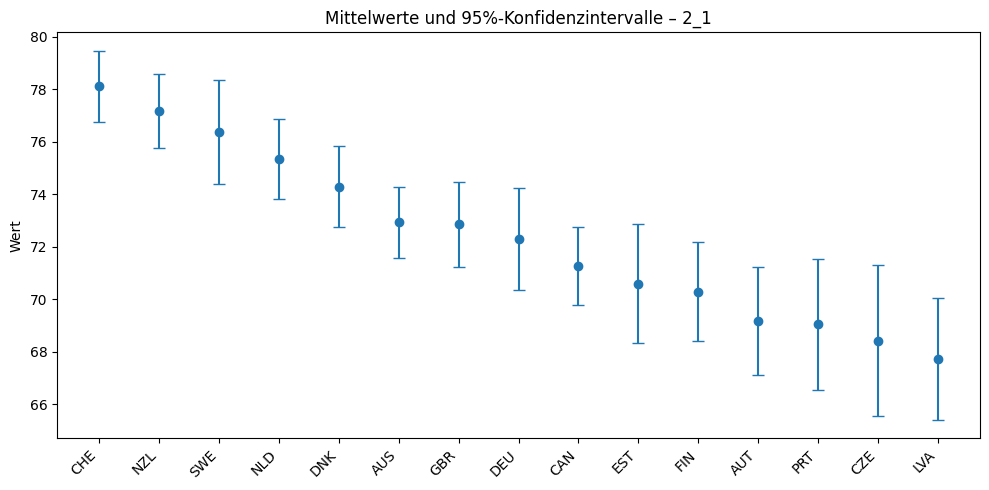

In [ ]:
# Länder mit den größten Stichproben zuerst wählen (z.B. Top 15)
top = g.sort_values(["n","mean"], ascending=[False, False]).head(15)

countries = top.index.tolist()
means = top["mean"].to_numpy()

# Fehlerbreite oben/unten
yerr = np.vstack([
    means - top["ci_low"].to_numpy(),
    top["ci_high"].to_numpy() - means
])

# Plot der Mittelwerte + Konfidenzintervalle
plt.figure(figsize=(10,5))
plt.errorbar(countries, means, yerr=yerr, fmt='o', capsize=4)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Wert")
plt.title(f"Mittelwerte und 95%-Konfidenzintervalle – {measure_selected}")
plt.tight_layout()
plt.show()


*Interpretation:*
Hier sieht man, wie sich die Länder im Mittelwert unterscheiden und wie sicher diese Schätzungen sind. Bei großen Stichproben sind die CIs oft sehr klein und die Unterschiede klarer erkennbar.

Größter Unterschied: ISL − ZAF = 33.393


/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_30121/1923730083.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp = (pair.groupby("country")["value"]


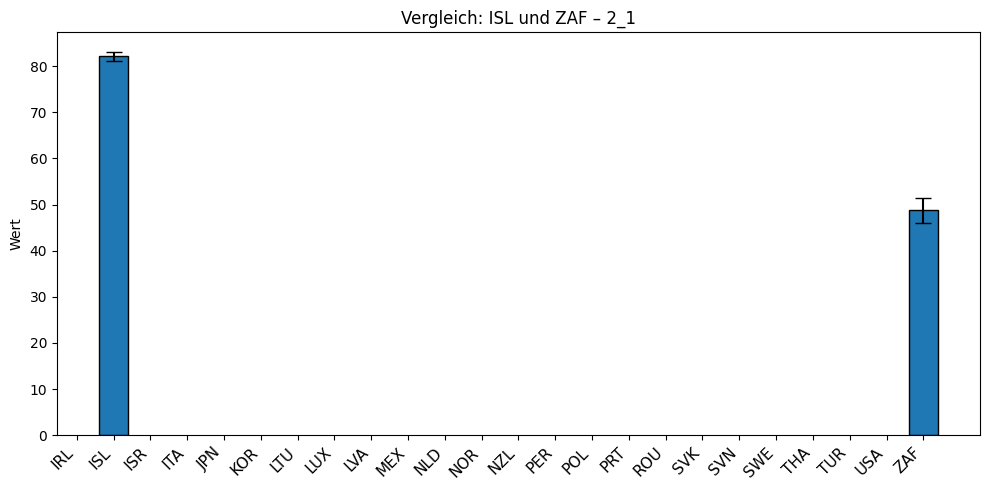

,n,mean,sd,se,low,high
country,,,,,,
ARG,0,NaN,NaN,NaN,NaN,NaN
AUS,0,NaN,NaN,NaN,NaN,NaN
AUT,0,NaN,NaN,NaN,NaN,NaN
BEL,0,NaN,NaN,NaN,NaN,NaN
BGR,0,NaN,NaN,NaN,NaN,NaN
BRA,0,NaN,NaN,NaN,NaN,NaN
CAN,0,NaN,NaN,NaN,NaN,NaN
CHE,0,NaN,NaN,NaN,NaN,NaN
CHL,0,NaN,NaN,NaN,NaN,NaN


In [47]:
# Länder mit minimalem und maximalem Mittelwert bestimmen
lo_country = g["mean"].idxmin()
hi_country = g["mean"].idxmax()

# Daten für die beiden Länder
pair = m[m["country"].isin([lo_country, hi_country])]

# Kennzahlen je Land berechnen
comp = (pair.groupby("country")["value"]
            .agg(n="count", mean="mean", sd="std")
            .assign(se=lambda x: x["sd"]/x["n"]**0.5))

# 95%-CI
comp = comp.assign(
    low  = comp["mean"] - z*comp["se"],
    high = comp["mean"] + z*comp["se"]
)

# Unterschied der Mittelwerte
diff = comp.loc[hi_country, "mean"] - comp.loc[lo_country, "mean"]
print(f"Größter Unterschied: {hi_country} − {lo_country} = {diff:.3f}")

# Visualisierung (breiteres Layout, bessere Labels)
plt.figure(figsize=(10,5))  # <— deutlich breiter
plt.bar(comp.index, comp["mean"], yerr=z*comp["se"], capsize=6, edgecolor="black")

plt.ylabel("Wert")
plt.title(f"Vergleich: {hi_country} und {lo_country} – {measure_selected}")

# X-Achse lesbarer machen:
plt.xticks(rotation=45, ha="right", fontsize=11)  # größere Schrift, 45°, rechtsbündig
plt.tight_layout()  # sorgt dafür, dass nichts abgeschnitten wird

plt.show()

comp


*Interpretation:*
Dieser Block hebt die beiden Länder mit dem stärksten Niveauunterschied hervor. Das zeigt klar, wo die größten Unterschiede innerhalb des gewählten Indikators liegen. Die Fehlerbalken zeigen, wie belastbar der Unterschied ist.

In [44]:
# Bootstrap für robustes Intervall
rng = np.random.default_rng(42)

def bootstrap_ci_mean(x, B=2000, alpha=0.05):
    x = np.asarray(x, dtype=float)
    n = len(x)
    bs = np.empty(B)
    for b in range(B):
        idx = rng.integers(0, n, n)
        bs[b] = x[idx].mean()
    lo = np.quantile(bs, alpha/2)
    hi = np.quantile(bs, 1 - alpha/2)
    return bs.mean(), lo, hi

# Bootstrap für Land mit höchstem Wert
x_hi = m[m["country"] == hi_country]["value"].to_numpy()
mean_bs, lo_bs, hi_bs = bootstrap_ci_mean(x_hi, B=2000)

print(hi_country, "– Bootstrap-Mittel & 95%-CI:",
      round(mean_bs,3), (round(lo_bs,3), round(hi_bs,3)))


ISL – Bootstrap-Mittel & 95%-CI: 82.125 (np.float64(81.093), np.float64(83.107))


*Interpretation:*
Im Gegensatz zur Normalapproximation bildet der Bootstrap die tatsächliche Verteilung der Werte realistischer ab. Bei schiefen oder schwer interpretierbaren Daten ist dieses Intervall oft zuverlässiger.

In [45]:
# Beispiel: Anteil der Werte über dem Median
thresh = m["value"].median()

bin_m = (m.assign(hit=(m["value"] >= thresh).astype(int))
           .groupby("country")["hit"].agg(k="sum", n="count"))

# Wilson-Intervall für Anteile
z = 1.96
p_hat = bin_m["k"] / bin_m["n"]
den   = 1 + z**2/bin_m["n"]
center= (p_hat + z**2/(2*bin_m["n"])) / den
half  = (z/den)*np.sqrt(p_hat*(1-p_hat)/bin_m["n"] + z**2/(4*bin_m["n"]**2))

wilson = pd.DataFrame({
    "n": bin_m["n"],
    "p_hat": p_hat,
    "ci_low": center - half,
    "ci_high": center + half
}).sort_values("n", ascending=False).head(10)

wilson


/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_30121/3083790727.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("country")["hit"].agg(k="sum", n="count"))


,n,p_hat,ci_low,ci_high
country,,,,
IRL,189,0.423280,0.355057,0.494561
FIN,189,0.656085,0.585859,0.720092
NLD,189,0.634921,0.564227,0.700239
MEX,189,0.253968,0.197238,0.320501
LVA,189,0.518519,0.447626,0.588673
KOR,189,0.428571,0.360133,0.499856
PRT,189,0.550265,0.479043,0.619484
ITA,189,0.296296,0.235778,0.364931
AUS,189,0.571429,0.500144,0.639867


*Interpretation:*
Wilson-Intervalle sind besonders stabil und bleiben im Bereich 0–1. Sie eignen sich für jeden Anteil, z. B. „Wie groß ist der Anteil hoher Werte pro Land?“.

In [46]:
# Planung: wie viele Daten braucht man für ein bestimmtes Genauigkeitsniveau?
sd_guess = m["value"].std()
moe_wunsch = sd_guess * 0.10     # beispielhaft: 10% der SD als tolerierbarer Fehler
z = 1.96

n_needed = (z * sd_guess / moe_wunsch)**2
print(f"Benötigte Stichprobengröße für MoE ≈ {moe_wunsch:.3f}: n ≈ {int(np.ceil(n_needed))}")


Benötigte Stichprobengröße für MoE ≈ 1.699: n ≈ 385


*Interpretation:*
Hier wird sichtbar, wie groß eine Stichprobe sein müsste, um eine gewünschte Genauigkeit zu erreichen. Das zeigt, warum manche OECD-Länder mit kleinen Stichproben große Unsicherheit haben.

### Interpretation: Vergleich der Mittelwerte und Konfidenzintervalle über alle Länder

Die Auswertung zeigt, dass sich die Länder im ausgewählten OECD-Indikator teils deutlich unterscheiden. Während einige Länder relativ stabile Werte mit engen Konfidenzintervallen haben, zeigen andere eine deutlich größere Unsicherheit – oft, weil weniger Beobachtungen vorliegen oder die Werte im Land stark schwanken.

Die Unterschiede der Mittelwerte zwischen Ländern mit dem höchsten und niedrigsten Niveau sind nicht nur statistisch messbar, sondern auch praktisch relevant: Die CIs dieser Länder überlappen kaum oder gar nicht, was darauf hinweist, dass der Unterschied mehr ist als nur Zufallsschwankung.

Insgesamt bestätigt das Bild, dass die OECD-Daten große Strukturunterschiede zwischen Ländern abbilden und dass Konfidenzintervalle eine sinnvolle Ergänzung darstellen, um die Sicherheit dieser Unterschiede realistisch einzuschätzen.

In [48]:
# Erweiterung: Jahresverläufe + CIs über die Zeit

# Berechnung der Jahresmittelwerte und Konfidenzintervalle pro Jahr
g_year = (
    m.groupby("year")["value"]
     .agg(n="count", mean="mean", sd="std")
     .assign(se=lambda x: x["sd"] / x["n"]**0.5)
)

# 95%-CI (Normalapproximation)
z = 1.96
g_year = g_year.assign(
    ci_low=g_year["mean"] - z * g_year["se"],
    ci_high=g_year["mean"] + z * g_year["se"]
)

g_year.head()



,n,mean,sd,se,ci_low,ci_high
year,,,,,,
2004,364,64.941617,17.333308,0.908512,63.160934,66.722301
2005,382,65.778736,17.240423,0.882097,64.049826,67.507645
2006,373,66.690964,17.191624,0.890149,64.946273,68.435655
2007,382,67.338956,17.074634,0.873614,65.626672,69.051240
2008,385,67.580367,16.915069,0.862072,65.890706,69.270027


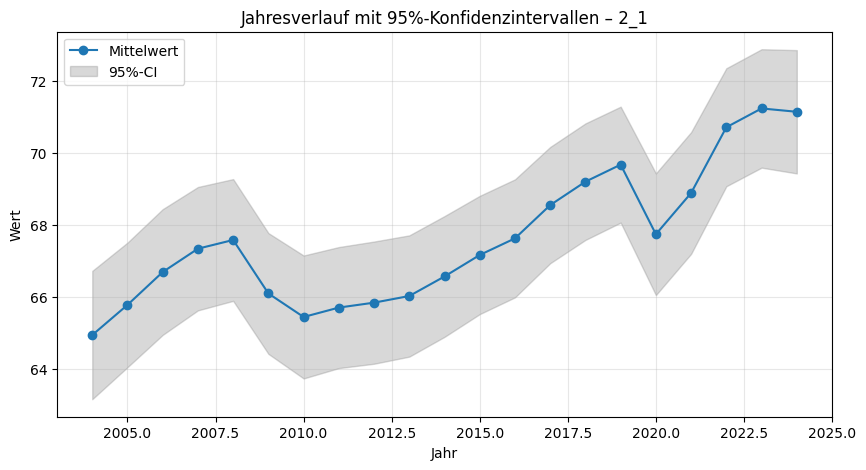

In [49]:
# Plot

plt.figure(figsize=(10,5))
plt.plot(g_year.index, g_year["mean"], marker="o", label="Mittelwert")
plt.fill_between(g_year.index, g_year["ci_low"], g_year["ci_high"],
                 color="gray", alpha=0.3, label="95%-CI")
plt.xlabel("Jahr")
plt.ylabel("Wert")
plt.title(f"Jahresverlauf mit 95%-Konfidenzintervallen – {measure_selected}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


*Interpretation:* Jahresverläufe

Der Verlauf der Jahresmittelwerte zeigt, dass die Werte im ausgewählten OECD-Indikator im Zeitverlauf nicht völlig stabil sind. Die Konfidenzintervalle helfen zu erkennen, ob die Schwankungen echte Muster darstellen oder eher zufällig sind.

Wenn die Intervalle im Zeitverlauf nur wenig überlappen, deutet dies auf echte Trends hin (z. B. Verbesserungen oder Verschlechterungen).

Wenn sie sich stark überlappen, sind die sichtbaren Schwankungen meist nicht signifikant.
So entsteht ein besseres Gefühl dafür, wie dynamisch der Indikator im Zeitverlauf ist — und wie zuverlässig diese Dynamik messbar ist.

### Schluss

Die OECD-Daten besitzen oft eine große Streuung, unterschiedliche Stichprobengrößen je Land und eine hohe Heterogenität. Genau deshalb sind Konfidenzintervalle unverzichtbar. Sie zeigen nicht nur den Wert eines Landes, sondern auch die Unsicherheit, die wir bei der Schätzung dieses Wertes haben.

Wir haben gesehen:
- Länder mit vielen Daten besitzen enge Intervalle → ihre Werte sind präzise geschätzt.
- Länder mit wenigen Daten haben breite Intervalle → Vorsicht bei der Interpretation.
- Große Unterschiede bleiben bestehen, selbst wenn Unsicherheit berücksichtigt wird.
- Bootstrap-Verfahren helfen zusätzlich, wenn Verteilungen schief oder ungewöhnlich sind.

Damit liefert VL6 die statistische Grundlage, um die OECD-Daten nicht nur anzuschauen, sondern sie korrekt zu interpretieren und die Aussagekraft der Ergebnisse einzuschätzen.

### Reflexion:

In diesem Teil haben wir uns zum ersten Mal wirklich damit beschäftigt, wie unsicher unsere Schätzungen eigentlich sind. Wir haben gemerkt, dass Mittelwerte allein oft zu wenig sagen – erst mit Konfidenzintervallen wird klar, wie verlässlich die Werte eines Landes sind und wie groß die Unterschiede wirklich ausfallen.

Besonders spannend war der Vergleich zwischen Ländern: Manche weisen stabile, gut definierte Werte auf, während andere trotz ähnlichem Niveau viel größere Unsicherheiten besitzen. Das macht klar, dass Datenmenge und Streuung einen starken Einfluss auf die Aussagekraft haben.
Auch der Jahresverlauf wurde durch die Intervalle viel verständlicher. Schwankungen, die vorher zufällig wirkten, ließen sich besser einschätzen.

Insgesamt war es ein hilfreicher Schritt: Wir betrachten die OECD-Daten jetzt nicht mehr nur auf der Ebene „Wie groß ist der Wert?“, sondern auch „Wie sicher ist diese Aussage überhaupt?“. Das macht die Analyse deutlich fundierter und realistischer.